In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [6]:
# Create a path to the code file
codeDir = os.path.dirname(os.path.abspath(os.getcwd()))
parentDir = os.path.dirname(codeDir)

precip_folder = os.path.join(parentDir,"precip_stats")
storm_folder = os.path.join(parentDir,"CO_storm_output")
mrms_folder = os.path.join(parentDir,"MRMS","2min_rate_cat_month_CO","eval")

unique = np.arange(0,0.1,0.01)

look at MRMS for 10 months

In [7]:
filenames_rate = glob.glob(mrms_folder+'\\'+'*.grib2')

In [9]:
mrms_rate = xr.open_dataset(filenames_rate[0],engine = "cfgrib",chunks={'time': '50MB'})

Can't read index file 'Z:\\MRMS\\2min_rate_cat_month_CO\\eval\\aug_2021_rate_CO.grib2.923a8.idx'
Traceback (most recent call last):
  File "C:\Users\whitep\Miniconda3\envs\radar\lib\site-packages\cfgrib\messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "C:\Users\whitep\Miniconda3\envs\radar\lib\site-packages\cfgrib\messages.py", line 429, in from_indexpath
    index = pickle.load(file)
EOFError: Ran out of input


In [13]:
test = mrms_rate.where(mrms_rate.unknown<0,drop=True)

C:\Users\whitep\Miniconda3\envs\radar\lib\site-packages\xarray\core\indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
C:\Users\whitep\Miniconda3\envs\radar\lib\site-packages\xarray\core\indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = val

In [38]:
test = test.to_dataframe()

In [43]:
test=test.reset_index().groupby(['latitude','longitude']).sum().to_xarray()

In [1]:
test.to_dataframe().dropna().max()

NameError: name 'test' is not defined

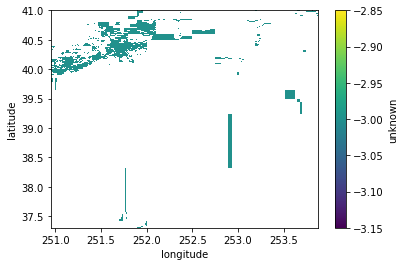

In [51]:
test.unknown.plot()